In [19]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
math_problems = pd.read_csv("data_with_ner_pos_vocabcount.csv")


In [3]:
math_problems.drop(columns=["problem", "modified_problem", "math_vocab_count"], inplace=True)

In [13]:
Y = math_problems["level"]
X = math_problems.drop(columns=['level'])

In [14]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
X = selector.fit_transform(X)

For DBSCAN parameters estimation for eps and minPts, we follow the following rule

1. minPts = 2*Dimensions of the data
2. eps
    Epsilon is calculated using approach based on this paper: https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf

    This technique calculates the average distance between each point and its k nearest neighbors, where k = the MinPts value you selected. The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

For plotting the average k-distances,

In [20]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [21]:
neighbors = NearestNeighbors(n_neighbors=2*len(X[0]))
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

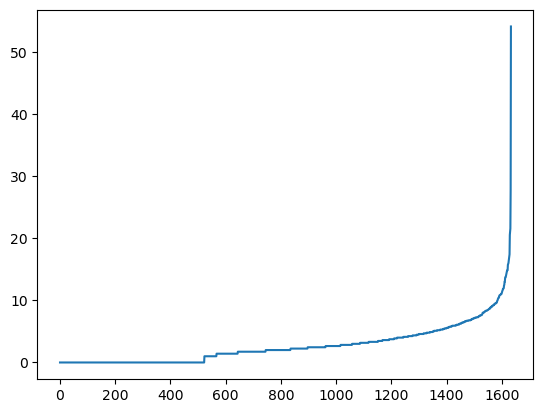

In [22]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

We find the point of maximum curvature around 10

In [23]:
dbscan = DBSCAN(min_samples=2*len(X[0]), eps=10)
cluster_labels = dbscan.fit_predict(X)

Finding the disconnected points

In [24]:
isolated_points = X[np.where(cluster_labels == -1)]

In [26]:
len(isolated_points)

146

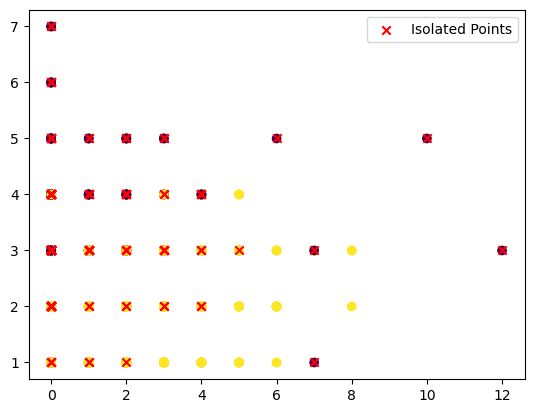

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(isolated_points[:, 0], isolated_points[:, 1], color='red', marker='x', label='Isolated Points')
plt.legend()
plt.show()

Removing the disconnected points and performing Spectral clustering using rbf kernel

In [27]:
filtered_X = np.delete(X, np.where(cluster_labels == -1)[0], axis=0)


In [47]:
filtered_cluster_labels = np.delete(cluster_labels, np.where(cluster_labels == -1)[0], axis=0)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


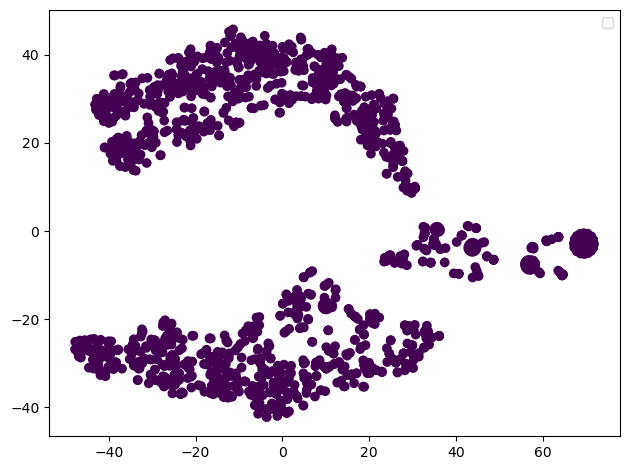

In [48]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(filtered_X)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=filtered_cluster_labels, cmap='viridis')
plt.legend()

plt.tight_layout()
plt.show()

In [44]:
np.save("filtered_X.npy", filtered_X)

In [52]:
filtered_X

array([[ 0,  2, 41, ...,  0,  5,  0],
       [ 1,  1, 22, ...,  0,  0,  0],
       [ 2,  1, 10, ...,  0,  0,  0],
       ...,
       [ 4,  3, 37, ...,  0,  3,  0],
       [ 4,  1,  9, ...,  0,  0,  0],
       [ 2,  3, 40, ...,  0,  3,  0]])

In [55]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

results = []
silhouette_scores = []

# Apply spectral clustering
n_clusters_range = [2,3,4,5]
for n_clusters in n_clusters_range:
  spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
  labels = spectral_clustering.fit_predict(filtered_X)
  results.append(labels)

AttributeError: 'NoneType' object has no attribute 'split'

Dimensionality reduction using tsne

In [30]:
from sklearn.manifold import TSNE

# Assuming you have your data in the variable X

# Create a t-SNE instance with the desired parameters
tsne = TSNE(n_components=2, random_state=42)

# Apply t-SNE for dimensionality reduction
X_tsne = tsne.fit_transform(filtered_X)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


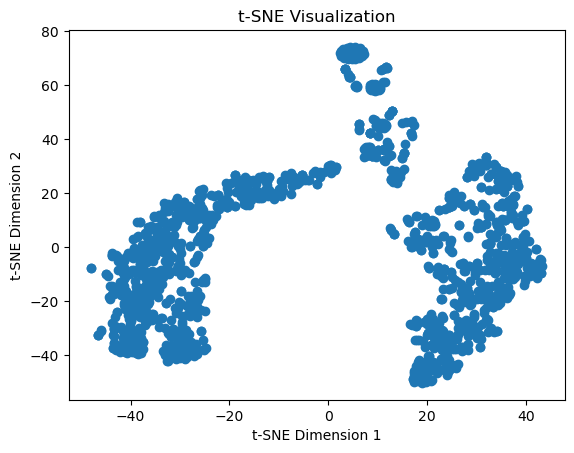

In [31]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization')
plt.show()